# Gathering data

In [112]:
# import basic libraries
import pandas as pd
import numpy as np

In [113]:
# read available data
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [114]:
# test 
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [115]:
# import libraries
import requests
import os

In [116]:
# get images
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", 'wb') as f:
    f.write(response.content)
    
df_image_predictions  = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [117]:
# make directory if it doesn't exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [118]:
# use twitter API
import tweepy as tw
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'TqcSdX6yZJD6LPwVfdTh7Blha'
consumer_secret = 'RjEm48eaJtAjVX3z7nPM6VixuLGnQCH1fggyDFkTQsAhmqrHl7'
access_token = '4066789517-e18mm2urSaiZRtixmMHakfKCXvCIEnCnAm91hgj'
access_secret = 'TWitZrwHdOyRpFnrS9x0RySZ4XZ0tHkPoFFH4mZZz574k'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

# use tweet ID from image_predictions to gather the posts and tweet count info
tweet_ids = df_image_predictions.tweet_id.values

# gathering the lenghts of tweets
len(tweet_ids)


2075

In [119]:
# test
tweet_ids

array([666020888022790149, 666029285002620928, 666033412701032449, ...,
       891815181378084864, 892177421306343426, 892420643555336193])

In [120]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0

fails_dict = {}

start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

with open('tweet_json.txt', 'w') as outfile:

# This loop will likely take 20-30 minutes to run because of Twitter's rate limit

    for tweet_id in tweet_ids:

        count += 1

        print(str(count) + ": " + str(tweet_id))

        try:

            tweet = api.get_status(tweet_id, tweet_mode='extended')

            print("Success")

            json.dump(tweet._json, outfile)
        
            outfile.write('\n')
            
        except tw.TweepError as e:

            print("Fail")
            fails_dict[tweet_id] = e
            pass
        
end = timer()



16
Success
1445: 775733305207554048
Success
1446: 775842724423557120
Success
1447: 775898661951791106
Success
1448: 776088319444877312
Success
1449: 776113305656188928
Success
1450: 776201521193218049
Success
1451: 776218204058357768
Success
1452: 776477788987613185
Success
1453: 776813020089548800
Success
1454: 776819012571455488
Success
1455: 777189768882946048
Success
1456: 777621514455814149
Success
1457: 777641927919427584
Success
1458: 777684233540206592
Success
1459: 777885040357281792
Success
1460: 778027034220126208
Success
1461: 778039087836069888
Success
1462: 778286810187399168
Success
1463: 778383385161035776
Success
1464: 778396591732486144
Success
1465: 778408200802557953
Success
1466: 778624900596654080
Success
1467: 778650543019483137
Success
1468: 778748913645780993
Success
1469: 778990705243029504
Success
1470: 779056095788752897
Success
1471: 779123168116150273
Fail
1472: 779377524342161408
Success
1473: 779834332596887552
Success
1474: 780192070812196864
Success
14

In [121]:
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        print(json.dumps(json_data,indent=2))
        break

{
  "created_at": "Sun Nov 15 22:32:08 +0000 2015",
  "id": 666020888022790149,
  "id_str": "666020888022790149",
  "full_text": "Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj",
  "truncated": false,
  "display_text_range": [
    0,
    131
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 666020881337073664,
        "id_str": "666020881337073664",
        "indices": [
          108,
          131
        ],
        "media_url": "http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
        "media_url_https": "https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg",
        "url": "https://t.co/BLDqew2Ijj",
        "display_url": "pic.twitter.com/BLDqew2Ijj",
        "expanded_url": "https://twitter.com/dog_rates/status/666020888022790149/photo/1",
        "type": "photo",
        "sizes": {
          "medium": {
            "

In [122]:
# create df
df_tweets = pd.DataFrame(columns=['tweet_id','retweet_count', 'favorite_count'])
with open('tweet_json.txt') as file:
    for line in file:
        print(line)
        status = json.loads(line)
        tweet_id = status['id_str']
        rt_count = status['retweet_count']
        fav_count = status['favorite_count']
        df_tweets = df_tweets.append(pd.DataFrame([[tweet_id,rt_count, fav_count]],columns=['tweet_id','retweet_count', 'favorite_count']))

2800\u2800\u2800\u2800\u2800", "url": "https://t.co/6ytGi24QCk", "entities": {"url": {"urls": [{"url": "https://t.co/6ytGi24QCk", "expanded_url": "http://campsite.bio/weratedogs", "display_url": "campsite.bio/weratedogs", "indices": [0, 23]}]}, "description": {"urls": []}}, "protected": false, "followers_count": 8941627, "friends_count": 18, "listed_count": 6213, "created_at": "Sun Nov 15 21:41:29 +0000 2015", "favourites_count": 146140, "utc_offset": null, "time_zone": null, "geo_enabled": true, "verified": true, "statuses_count": 13281, "lang": null, "contributors_enabled": false, "is_translator": false, "is_translation_enabled": false, "profile_background_color": "000000", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_image_url": "http://pbs.twimg.com/profile_images/1322993722691211264/vyjR1ftm_normal.jpg", "profi

In [123]:
# test 
df_tweets

,tweet_id,retweet_count,favorite_count
0,666020888022790149,445,2337
0,666029285002620928,41,118
0,666033412701032449,39,107
0,666044226329800704,122,261
0,666049248165822465,38,94
...,...,...,...
0,831315979191906304,1086,6396
0,831322785565769729,1506,9094
0,831552930092285952,2261,8778
0,831650051525054464,1869,6969


In [124]:
# Make copy of dataframes so I can go back to the original if needed:
df_archive_copy = df_archive.copy
df_tweets_copy = df_tweets.copy
df_image_predictions_copy = df_image_predictions.copy

# Assessing data

In [125]:
# assess df_archive visually
df_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [126]:
df_archive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


In [127]:
# assess df_archive's shape
df_archive.shape

(2356, 17)

In [128]:
# assess df_archive's datatypes
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [129]:
# assess df_archive statistics
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [130]:
# assess df_archive's duplicated values
sum(df_archive.duplicated())

0

In [131]:
# assess df_archive's null values
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [132]:
# assess frequency and list of values in dognames column
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Tilly        1
Boston       1
Creg         1
Stormy       1
Monty        1
Name: name, Length: 957, dtype: int64

In [133]:
# assess df_tweets visually
df_tweets.head(20)

,tweet_id,retweet_count,favorite_count
0,666020888022790149,445,2337
0,666029285002620928,41,118
0,666033412701032449,39,107
0,666044226329800704,122,261
0,666049248165822465,38,94
0,666050758794694657,51,119
0,666051853826850816,745,1090
0,666055525042405380,212,398
0,666057090499244032,118,264
0,666058600524156928,50,103


In [134]:
# assess df_tweets visually
df_tweets.tail(20)

,tweet_id,retweet_count,favorite_count
0,828409743546925057,1130,6218
0,828650029636317184,1297,9317
0,828708714936930305,10889,35740
0,828770345708580865,5698,25056
0,829011960981237760,15918,52247
0,829141528400556032,7131,23864
0,829449946868879360,1953,10253
0,829501995190984704,10313,31080
0,829861396166877184,1881,11999
0,829878982036299777,4864,0


In [135]:
# assess df_tweets's shape
df_tweets.shape

(1793, 3)

In [136]:
# assess df_tweets's datatypes
df_tweets.dtypes


tweet_id          object
retweet_count     object
favorite_count    object
dtype: object

In [137]:
# assess df_tweets's statistics
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,1793,1793,1793
unique,1793,1330,1581
top,666781792255496192,488,0
freq,1,5,60


In [138]:
# assess df_tweets's duplicated values
df_tweets.duplicated().sum()

0

In [139]:
# assess df_tweets's null values
df_tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [140]:
# assess df_image_predications visually 
df_image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [141]:
# assess df_image_predications visually 
df_image_predictions.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [142]:
# assess df_image_predications's shape
df_image_predictions.shape

(2075, 12)

In [143]:
# assess df_image_predications's datatypes
df_image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [144]:
# assess df_image_predications's statistics
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [145]:
# assess df_image_predications's duplicated values
df_image_predictions.duplicated().sum()

0

In [146]:
# assess df_image_predications's null values
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

## Summary of Assesment

### Quality Issues

*Archived data set*
- `timestamp` column is in string format, it should be datetime
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are float type, they should be string
- `tweet_id` is an integer format, should be string
- `source` column's values include html code which is not needed, only need url
- `rate_numerator` and `rate_denominator` should be in one column and without decimals
- Some dog names start with  lowercase and are not dog names. These need to be removed.
- Remove retweets(as per Key Points)


*Image predictions data set*
- p1, p2, p3 names columns are not consistent in upper or lower case (should all be lowercase)
- `tweet_id` is an integer format, should be string

*Tweets data set*
- `tweet_id` is an integer format, should be string
- Retweet and Favorite: `retweet_count` and `favorite_count` should be integers, not floats. There is no such thing as half of a retweet or favorite.
- Remove retweets(as per Key Points)

### Tidiness issues

- doggo, floofer, puppo, pupper should not be separate columns but one column and it should state what category the dog is in
- need to combine datasets to a master dataset for analysing: `df_archived`, `df_tweets`, `df_image_predictions`
- removing all non relevant columns from the master dataset


# Cleaning data

### Quality issues

*Archived data set*

### Define 
**1. `timestamp` field is in string format, it should be datetime**

Action: convert timestamp field into datetime

### Code

In [147]:
# convert timestamp field into datetime
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

### Test

In [148]:
# test
df_archive.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Define
**2.`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are float type, they should be string**

Action: convert these columns values into string(object)

### Code

In [149]:
# convert these columns values into string(object)
df_archive['in_reply_to_status_id'] = df_archive['in_reply_to_status_id'].astype(str)

In [150]:
# convert these columns values into string(object)
df_archive['in_reply_to_user_id'] = df_archive['in_reply_to_user_id'].astype(str)

In [151]:
# convert these columns values into string(object)
df_archive['retweeted_status_id'] = df_archive['retweeted_status_id'].astype(str)

In [152]:
# convert these columns values into string(object)
df_archive['retweeted_status_user_id'] = df_archive['retweeted_status_user_id'].astype(str)

### Test

In [153]:
# test
df_archive.dtypes

tweet_id                                    int64
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Define
**3.`tweet_id` is an integer format, should be string**

Action: convert tweet_id values to string(object)

### Code

In [154]:
# convert tweet_id values to string(object)
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)

### Test

In [155]:
#test
df_archive.dtypes

tweet_id                                   object
in_reply_to_status_id                      object
in_reply_to_user_id                        object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                        object
retweeted_status_user_id                   object
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Define
**3. `source` column's values include html code which is not needed, only need url**

Action: extract not needed strings

### Code

In [156]:
# replace strings not needed 
df_archive['source'] = df_archive['source'].str.replace('<a href="','')
df_archive['source'] = df_archive['source'].str.replace('" rel="nofollow">Twitter for iPhone</a>','')


### Test

In [157]:
# test
pd.set_option('display.max_colwidth', None)

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Define
**4. - `rate_numerator` and `rate_denominator` should be in one column**

Action: melt the two columns's values with a slash in between

### Code

In [158]:
# convert them to str
df_archive['rating_numerator'] = df_archive['rating_numerator'].astype(str)
df_archive['rating_denominator'] = df_archive['rating_denominator'].astype(str)

In [159]:
# aggregate 
df_archive['rating'] = df_archive[['rating_numerator', 'rating_denominator']].agg('/'.join, axis=1)


In [160]:
#test 
df_archive


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,13/10
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,13/10
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,12/10
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,13/10
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,5/10
2352,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,6/10
2353,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,9/10
2354,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,7/10


In [161]:
# drop numerator and denominator columns
df_archive.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [162]:
#test
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13/10
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13/10
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12/10
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13/10
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,None,None,None,None,5/10
2352,666044226329800704,nan,nan,2015-11-16 00:04:52+00:00,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,a,None,None,None,None,6/10
2353,666033412701032449,nan,nan,2015-11-15 23:21:54+00:00,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,a,None,None,None,None,9/10
2354,666029285002620928,nan,nan,2015-11-15 23:05:30+00:00,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,a,None,None,None,None,7/10


### Define
**6. Some dog names start lowercase letters and are not dog names. They need to be removed.**

Action: identify and remove those rows with lower case lettered dog names



### Code

In [163]:
#filter for lowercase dog names
lowercase_dog = df_archive[df_archive['name'].str.islower()]

In [164]:
lowercase_dog.name

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [165]:
# there are 104 values that start with a lowercase. They need to be removed

df_archive = df_archive[~df_archive.name.str.islower()]

### Test

In [251]:
#test
df_archive.shape

(2071, 13)

### Define
**7. Remove retweets(as per Key Points)**

Action: fo find this, filter for rows that have "RT @" in them and remove these rows. 


### Code

In [167]:
# filter for string that contains RT @ and drop these rows 
df_archive.drop(df_archive[df_archive['text'].str.contains("RT @")].index, inplace = True) 

### Test

In [168]:
#test
df_archive.shape

(2071, 16)

### Define
*Image predictions dataset*

**8. p1, p2, p3 names columns are not consistent in upper or lower case (should all be lowercase)**

Action change values to lowercase

### Code

In [169]:
# change valuews to lowercase in p1 column to lowercase
df_image_predictions['p1'] = [str(i).lower() for i in df_image_predictions['p1']]

In [170]:
#test 
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [252]:
#test
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


In [171]:
#change values in p2 and p3 columns to lowercase
df_image_predictions['p2'] = [str(i).lower() for i in df_image_predictions['p2']]
df_image_predictions['p3'] = [str(i).lower() for i in df_image_predictions['p3']]

### Test

In [253]:
#test
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


### Define
**9. tweet_id is an integer format, should be string**

Action: convert to str(object)

### Code

In [173]:
# convert to str
df_image_predictions['tweet_id'] = df_image_predictions['tweet_id'].astype(str)


### Test

In [174]:
#test 
df_image_predictions.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Define 
*Tweets data set*

**10. tweet_id is an integer format, should be string**

Action: convert to str(object)

### Code

In [175]:
# convert to str
df_tweets['tweet_id'] = df_tweets['tweet_id'].astype(str)


### Test

In [176]:
# test
df_tweets.dtypes

tweet_id          object
retweet_count     object
favorite_count    object
dtype: object

### Define
**11. Retweet and Favorite: retweet_count and favorite_count should be integers, not floats.**

Action: convert to int

### Code

In [177]:
# convert to int
df_tweets['retweet_count'] = df_tweets['retweet_count'].astype(int)

In [178]:
# convert to int
df_tweets['favorite_count'] = df_tweets['favorite_count'].astype(int)

### Test

In [179]:
# test
df_tweets.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Tidiness issues

There is one issue which I continuely done throughout the cleaning process which belongs here: deleting the columns we don't need.

### Define

**1. doggo, floofer, puppo, pupper should not be separate columns but one column and it should state what category the dog is in**

Action: merge columns and create a column with either of these values

### Code

In [180]:
# merge columns and create a new column
def select_dog_stage(row):
    if row["doggo"] == 'doggo':
        return 'doggo'
    elif row["floofer"] == 'floofer':
        return 'floofer'
    elif row["pupper"] == 'pupper':
        return 'pupper'
    elif row["puppo"] == 'puppo':
        return 'puppo'     
    else:
        return 'None'
df_archive["dog_stage"] = df_archive.apply(lambda x: select_dog_stage(x), axis=1)

In [181]:
# check if all migrated
df_archive['dog_stage'].value_counts()

None       1741
pupper      213
doggo        84
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [182]:
#test 
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rating,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13/10,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13/10,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12/10,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13/10,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12/10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,nan,nan,2015-11-16 02:38:37+00:00,http://twitter.com/download/iphone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,nan,nan,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,None,None,None,None,None,6/10,None
2343,666073100786774016,nan,nan,2015-11-16 01:59:36+00:00,http://twitter.com/download/iphone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,nan,nan,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,None,None,None,None,None,10/10,None
2344,666071193221509120,nan,nan,2015-11-16 01:52:02+00:00,http://twitter.com/download/iphone,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,nan,nan,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,None,None,None,None,None,9/10,None
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,None,None,None,None,5/10,None


In [183]:
# drop columns
df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test

In [184]:
#test 
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rating,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13/10,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13/10,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12/10,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13/10,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12/10,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,nan,nan,2015-11-16 02:38:37+00:00,http://twitter.com/download/iphone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,nan,nan,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,None,6/10,None
2343,666073100786774016,nan,nan,2015-11-16 01:59:36+00:00,http://twitter.com/download/iphone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,nan,nan,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,None,10/10,None
2344,666071193221509120,nan,nan,2015-11-16 01:52:02+00:00,http://twitter.com/download/iphone,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,nan,nan,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,None,9/10,None
2351,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,None,5/10,None


### Define
**2. Merging the 3 datasets together(df_archived, df_image_predictions, df_tweets).**

Action: check tweets_id column values in each dataset and merge the datasets

In [185]:
df_archive['tweet_id'].value_counts()

673612854080196609    1
717009362452090881    1
750011400160841729    1
676533798876651520    1
670374371102445568    1
                     ..
844979544864018432    1
831262627380748289    1
680145970311643136    1
752568224206688256    1
828361771580813312    1
Name: tweet_id, Length: 2071, dtype: int64

In [186]:
df_image_predictions['tweet_id'].value_counts()

666781792255496192    1
725729321944506368    1
710997087345876993    1
738885046782832640    1
699775878809702401    1
                     ..
785170936622350336    1
695064344191721472    1
774314403806253056    1
670995969505435648    1
695816827381944320    1
Name: tweet_id, Length: 2075, dtype: int64

In [187]:
df_tweets['tweet_id'].value_counts()

666781792255496192    1
700518061187723268    1
738885046782832640    1
699775878809702401    1
678764513869611008    1
                     ..
817827839487737858    1
828650029636317184    1
785170936622350336    1
695064344191721472    1
695816827381944320    1
Name: tweet_id, Length: 1793, dtype: int64

In [188]:
#merge 
df_master_on =  df_archive.merge(df_image_predictions.merge(df_tweets), how='left', on=['tweet_id'])

In [189]:
#test if rows didn't disappear
df_master_on.shape

(2071, 26)

In [190]:
df_master_on

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",nan,nan,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",nan,nan,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,666082916733198337,nan,nan,2015-11-16 02:38:37+00:00,http://twitter.com/download/iphone,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,nan,nan,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,...,0.489814,True,bull_mastiff,0.404722,True,french_bulldog,0.048960,True,41.0,101.0
2067,666073100786774016,nan,nan,2015-11-16 01:59:36+00:00,http://twitter.com/download/iphone,Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,nan,nan,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,...,0.260857,True,english_foxhound,0.175382,True,ibizan_hound,0.097471,True,140.0,282.0
2068,666071193221509120,nan,nan,2015-11-16 01:52:02+00:00,http://twitter.com/download/iphone,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,nan,nan,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,...,0.503672,True,yorkshire_terrier,0.174201,True,pekinese,0.109454,True,52.0,134.0
2069,666049248165822465,nan,nan,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,38.0,94.0


Well, I'm not 100% satisfied with the quality of the merged data set now that I see it all together, but as clearing it properly will take a lot of time and that's not a requirement - I will leave it like this for now.

### Storing, Analyzing, and Visualizing Data for this Project




I will include 3 insights, visualising one of them with a barplot.

- Common dog names
- Tweets favorited by most users?
- What are the most common breeds found by the neural network?


In [232]:
#save the DF to a new csv
df_master_on.to_csv(r'/Users/lilmac/Dropbox/Data Analytics/Data Analysis Project/twitter_archive_master.csv', index=False)


In [197]:
#see what are the most common dog names
df_master_on['name'].value_counts()

None       680
Lucy        11
Charlie     11
Cooper      10
Oliver      10
          ... 
Jeffrie      1
Cecil        1
Divine       1
Bloo         1
Monty        1
Name: name, Length: 931, dtype: int64

In [200]:
#clean the None values first
df_master_on.drop(df_master_on.index[df_master_on['name'] == 'None'], inplace = True)

In [230]:
#see what are the most common dog names
df_master_on['name'].value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Penny       9
           ..
Iroh        1
Kanu        1
Jeffrie     1
Cecil       1
Monty       1
Name: name, Length: 930, dtype: int64

In [231]:
#import libraries to visualize
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Charlie'),
  Text(1, 0, 'Lucy'),
  Text(2, 0, 'Oliver'),
  Text(3, 0, 'Cooper'),
  Text(4, 0, 'Penny')])

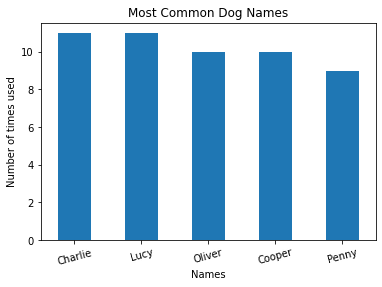

In [250]:
df_master_on['name'].value_counts()[:5].plot(kind="bar");
plt.xlabel('Names')
plt.ylabel('Number of times used')
plt.title('Most Common Dog Names')
plt.xticks(rotation = 15)

I used .value_counts() and the basic plotting function of matplotlib to gather these findings.

Charlie, Lucy, Oliver, Cooper and Penny are the most commonly used names in these tweets in descending order as it can be seen on the bar chart above.


In [242]:
#see which tweets favorited by most users?
df_master_on.nlargest(5, 'favorite_count')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
439,807106840509214720,nan,nan,2016-12-09 06:17:20+00:00,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,nan,nan,NaN,https://twitter.com/dog_rates/status/807106840509214720/video/1,...,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True,54642.0,116826.0
368,819004803107983360,nan,nan,2017-01-11 02:15:36+00:00,http://twitter.com/download/iphone,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,nan,nan,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",...,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True,36294.0,85805.0
1599,676219687039057920,nan,nan,2015-12-14 01:58:31+00:00,http://twitter.com/download/iphone,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,nan,nan,NaN,https://twitter.com/dog_rates/status/676219687039057920/photo/1,...,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,29308.0,72711.0
295,830583320585068544,nan,nan,2017-02-12 01:04:29+00:00,http://twitter.com/download/iphone,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,nan,nan,NaN,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",...,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True,16278.0,65276.0
302,829011960981237760,nan,nan,2017-02-07 17:00:28+00:00,http://twitter.com/download/iphone,This is Dexter. He was reunited with his mom yesterday after she was stuck in Iran during the travel Bannon. 13/10 welcome home https://t.co/U50RlRw4is,nan,nan,NaN,"https://twitter.com/dog_rates/status/829011960981237760/photo/1,https://twitter.com/dog_rates/status/829011960981237760/photo/1",...,0.312221,True,dalmatian,0.244040,True,conch,0.130273,False,15918.0,52247.0


I used .nlargest to determine which 5 dogs had the most favourite counts, ordered as:

Stephen with 116826
Bo with 85805
Kenneth with 72711
Lilly with 65276
Dexter with 52247


In [237]:
#what are the most common breeds found by the neural network?
df_master_on['p1'].value_counts()

golden_retriever              74
labrador_retriever            51
chihuahua                     50
pembroke                      49
pug                           35
                              ..
minibus                        1
microwave                      1
piggy_bank                     1
gordon_setter                  1
greater_swiss_mountain_dog     1
Name: p1, Length: 268, dtype: int64

I used a simple value_counts function to determine the common breed in the p1 column.

It looks like the most common breeds are:
Golden retriever with 74 dogs
Labrador retriever with 51 dogs
Chihuahua with 50 dogs
